Data Science Project on Amazon Bestselling Books Analysis with Python

I’m going to introduce you to a data science project on Amazon bestselling books analysis with the Python programming language. The data I’ll be using in this data science project is a dataset of Amazon’s 50 Best Books between 2009 and 2019.

The dataset contains 550 books and has been categorized into fiction and non-fiction using Goodreads.

In [2]:
import pandas as pd # dataframe manipulation
import numpy as np # linear algebra


In [1]:

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Seaborn verion 0.13.2


In [ ]:
print('Seaborn verion', sns.__version__)
sns.set_style('whitegrid')

In [3]:
# text data
import string
import re
df = pd.read_csv(r'C:\Data_Set\bestsellers with categories.csv')

In [4]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df.head()

,Name,Author,User_Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Now the next step is to prepare the data, here I will rename User Rating as user_rating, and then we will fix some spellings in the data:

In [26]:

df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In the data set, Genre is a categorical dummy variable; Fiction and non-fiction. Non-fiction was a more popular category than fiction, each year from 2009 to 2019. Of the 351 unique books, 54.4% were non-fiction and 45.6% were fiction.

The highest fraction (66%) of non-fiction books were sold in 2015 and the lowest for fiction books. For fiction books, the highest fraction (48%) of books were sold in 2009, 2013 and 2017, and the lowest for non-fiction books. Let’s visualize the data according to the genre:

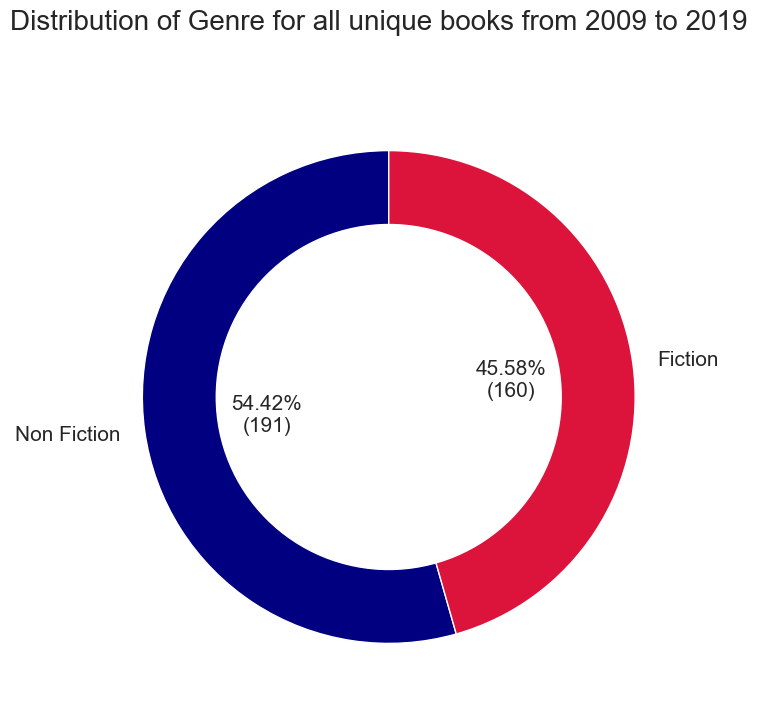

In [33]:
no_dup = df.drop_duplicates('Name')
g_count = no_dup['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

genre_col = ['navy','crimson']
#genre_col = ['khaki','plum']

center_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(x=g_count.values, labels=g_count.index, autopct=make_autopct(g_count.values), 
          startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=genre_col)
ax.add_artist(center_circle)

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
plt.show()

Now let’s visualize the above insights according to each year:

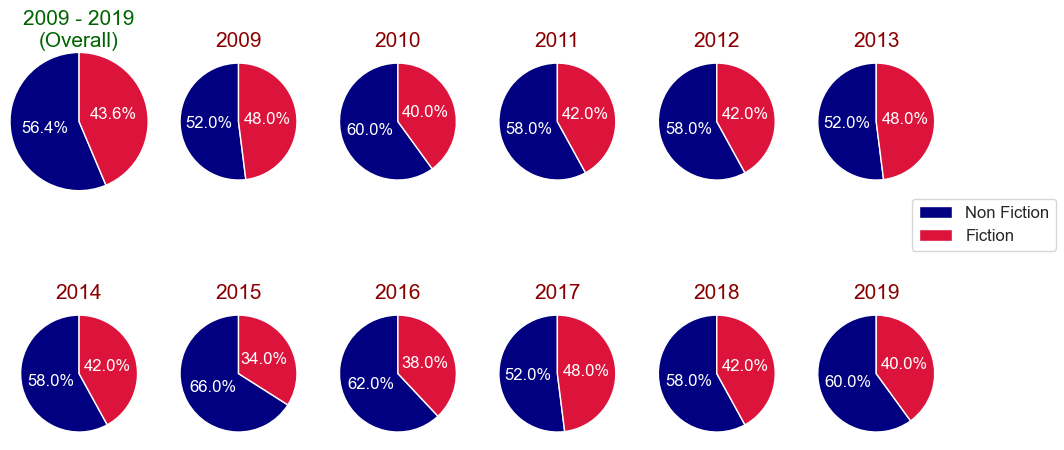

In [31]:
y1 = np.arange(2009, 2014)
y2 = np.arange(2014, 2020)
g_count = df['Genre'].value_counts()

fig, ax = plt.subplots(2, 6, figsize=(12,6))

ax[0,0].pie(x=g_count.values, labels=None, autopct='%1.1f%%',
            startangle=90, textprops={'size': 12, 'color': 'white'},
            pctdistance=0.5, radius=1.3, colors=genre_col)
ax[0,0].set_title('2009 - 2019\n(Overall)', color='darkgreen', fontdict={'fontsize': 15})

for i, year in enumerate(y1):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[0,i+1].set_title(year, color='darkred', fontdict={'fontsize': 15})
    ax[0,i+1].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                  startangle=90, textprops={'size': 12,'color': 'white'}, 
                  pctdistance=0.5, colors=genre_col, radius=1.1)

for i, year in enumerate(y2):
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[1,i].pie(x=counts.values, labels=None, autopct='%1.1f%%', 
                startangle=90, textprops={'size': 12,'color': 'white'},
                pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[1,i].set_title(year, color='darkred', fontdict={'fontsize': 15})

#plt.suptitle('Distribution of Fiction and Non-Fiction books for every year from 2009 to 2019',
             #fontsize=25)
fig.legend(g_count.index, loc='center right', fontsize=12)
plt.show()

The bestselling authors are selected based on their appearances in the top 50 bestselling books each year, from 2009 to 2019. Now let’s look at the top 10 bestselling authors of both fiction and non-fiction categories:

C:\Users\laxma\AppData\Local\Temp\ipykernel_28780\2335528297.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
C:\Users\laxma\AppData\Local\Temp\ipykernel_28780\2335528297.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')


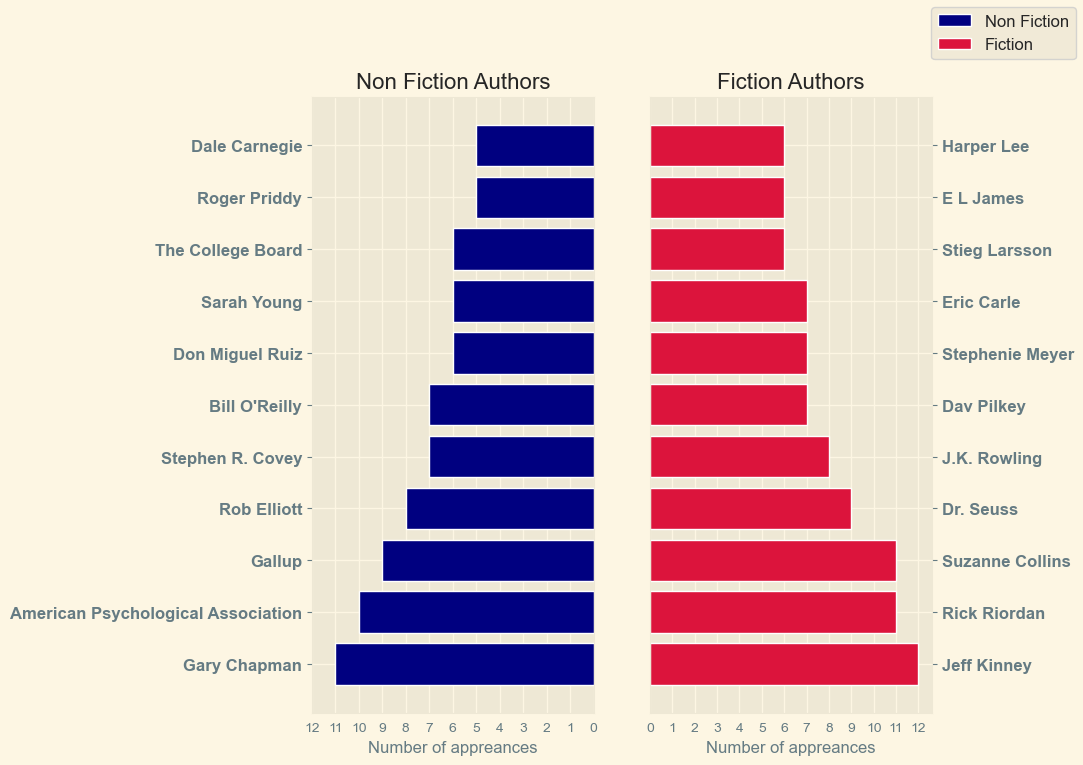

In [32]:
best_nf_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Non Fiction'].sort_values(ascending=False)[:11]
best_f_authors = df.groupby(['Author', 'Genre']).agg({'Name': 'count'}).unstack()['Name', 'Fiction'].sort_values(ascending=False)[:11]

with plt.style.context('Solarize_Light2'):
    fig, ax = plt.subplots(1, 2, figsize=(8,8))
    
    ax[0].barh(y=best_nf_authors.index, width=best_nf_authors.values,
           color=genre_col[0])
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_left()
    ax[0].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[0].set_yticklabels(best_nf_authors.index, fontsize=12, fontweight='semibold')
    ax[0].set_xlabel('Number of appreances')
    ax[0].set_title('Non Fiction Authors')
    
    ax[1].barh(y=best_f_authors.index, width=best_f_authors.values,
           color=genre_col[1])
    ax[1].yaxis.tick_right()
    ax[1].set_xticks(np.arange(max(best_f_authors.values)+1))
    ax[1].set_yticklabels(best_f_authors.index, fontsize=12, fontweight='semibold')
    ax[1].set_title('Fiction Authors')
    ax[1].set_xlabel('Number of appreances')
    
    fig.legend(['Non Fiction', 'Fiction'], fontsize=12)
    
plt.show()

Top-selling authors are selected based on their appearances in the top 50 best-selling books each year. The number of appearances includes duplicate book names. Their unique posts and overall reviews are featured below:

C:\Users\laxma\AppData\Local\Temp\ipykernel_28780\1934722200.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(top_authors.index, fontweight='semibold')


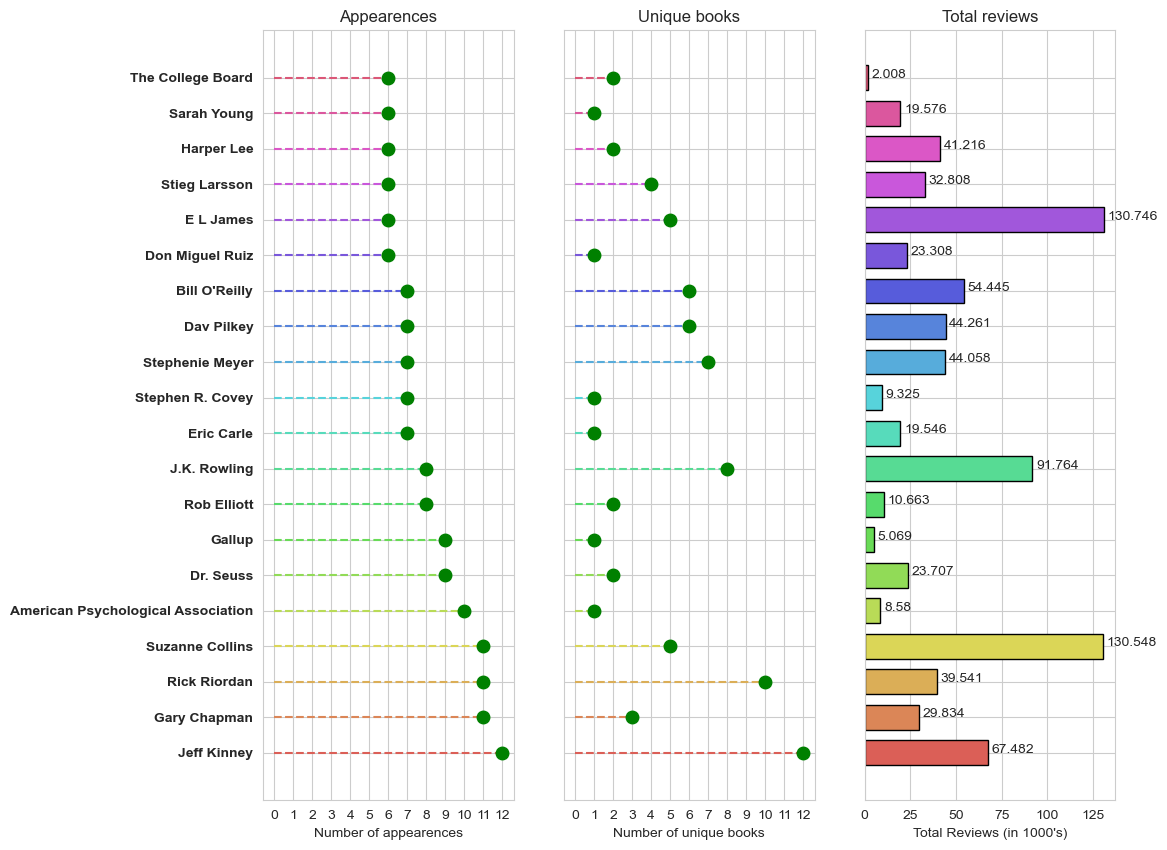

In [30]:
n_best = 20

top_authors = df.Author.value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name') # removes all rows with duplicate book names

fig, ax = plt.subplots(1, 3, figsize=(11,10), sharey=True)

color = sns.color_palette("hls", n_best)

ax[0].hlines(y=top_authors.index , xmin=0, xmax=top_authors.values, color=color, linestyles='dashed')
ax[0].plot(top_authors.values, top_authors.index, 'go', markersize=9)
ax[0].set_xlabel('Number of appearences')
ax[0].set_xticks(np.arange(top_authors.values.max()+1))
ax[0].set_yticklabels(top_authors.index, fontweight='semibold')
ax[0].set_title('Appearences')

book_count = []
total_reviews = []
for name, col in zip(top_authors.index, color):
    book_count.append(len(no_dup[no_dup.Author == name]['Name']))
    total_reviews.append(no_dup[no_dup.Author == name]['Reviews'].sum()/1000)
ax[1].hlines(y=top_authors.index , xmin=0, xmax=book_count, color=color, linestyles='dashed')
ax[1].plot(book_count, top_authors.index, 'go', markersize=9)
ax[1].set_xlabel('Number of unique books')
ax[1].set_xticks(np.arange(max(book_count)+1))
ax[1].set_title('Unique books')

ax[2].barh(y=top_authors.index, width=total_reviews, color=color, edgecolor='black', height=0.7)
for name, val in zip(top_authors.index, total_reviews):
    ax[2].text(val+2, name, val)
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total reviews')

#plt.suptitle('Top 20 best selling Authors (from 2009 to 2019) details', fontsize=15)
plt.show()



Conclusion :

Author Jeff Kinney is the best-selling author with 12 appearances in best-selling books from 2009 to 2019. This is how we can analyze any data related to sales consisting of different categories.